In [1]:
! pip install numpy matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### Fetch required log file and parse for information

In [2]:
# Update file name before execution. 
# Location can be determined from https://docs.unity3d.com/Manual/LogFiles.html
file_name = f'/Users/abhisheksnair/Library/Logs/Unity/Editor.log'
log_file_obj = open(file_name)

#### Iterate through file and get the data

In [3]:
velocity_dict = {}
interim_pos_dict = {}
for line in log_file_obj:
    if line.__contains__("VELOCITY"):
        tokens = line.split(" ")
        car_name = tokens[0]
        velocity = tokens[1].split("=")[1].strip()
        if car_name not in velocity_dict:
            velocity_dict[car_name] = []
        velocity_dict[car_name].append(float(velocity))
    elif line.__contains__("INTERMEDIATE_POSITION"):
        tokens = line.split(" ")
        car_name = tokens[0]
        position = tokens[1].split("=")[1].strip()
        if car_name not in interim_pos_dict:
            interim_pos_dict[car_name] = []
        interim_pos_dict[car_name].append(float(position))
def visualize(data_dict, title_name):
    for car_name in data_dict:
        plt.figure
        frame_nums = np.arange(0, len(data_dict[car_name]))
        plt.plot(frame_nums, data_dict[car_name], label=car_name)
        plt.ylabel('Velocity')
        plt.legend()
        plt.title(title_name)
        plt.xlabel('Frame number')
        plt.show()
print(velocity_dict.keys())
print(interim_pos_dict.keys())

dict_keys(['Car02', 'Car12', 'Car05', 'Car15', 'Car06', 'Car07', 'Car18', 'Car09', 'Car00', 'Car11', 'Car14', 'Car08', 'Car10', 'Car01', 'Car13', 'Car16', 'Car04', 'Car03', 'Car19', 'Car17'])
dict_keys(['Car02', 'Car12', 'Car05', 'Car15', 'Car06', 'Car07', 'Car18', 'Car09', 'Car00', 'Car11', 'Car14', 'Car08', 'Car10', 'Car01', 'Car13', 'Car16', 'Car04', 'Car03', 'Car19', 'Car17'])


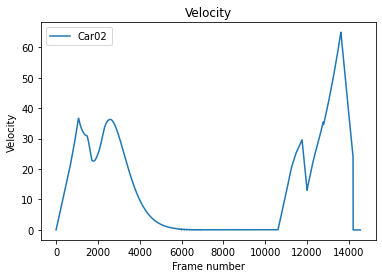

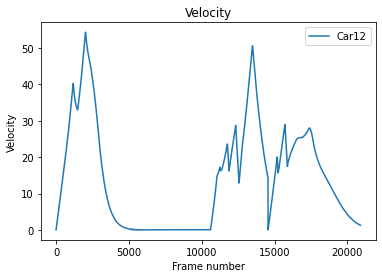

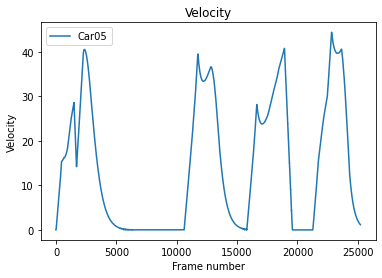

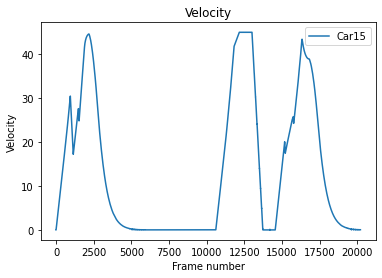

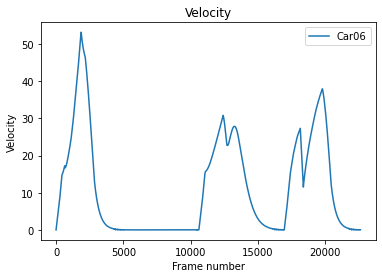

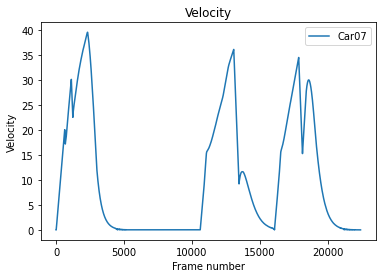

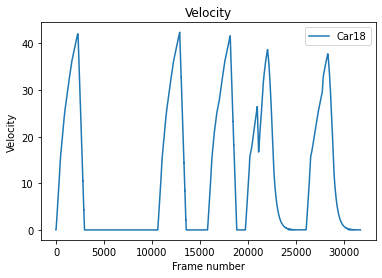

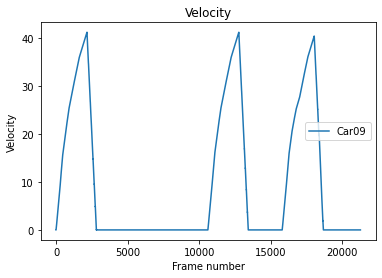

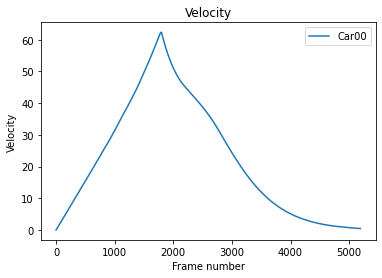

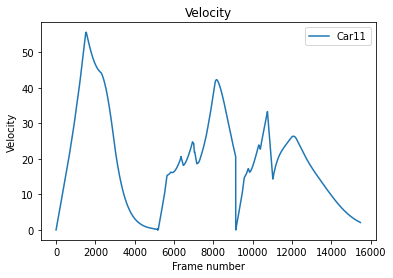

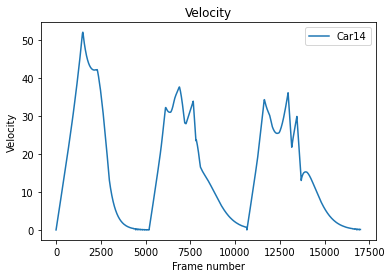

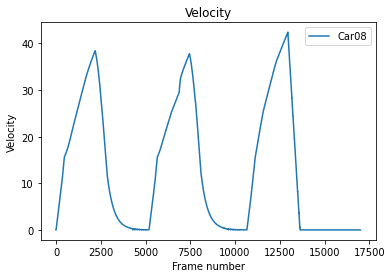

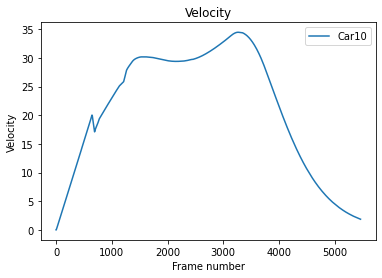

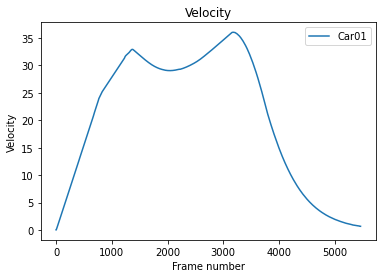

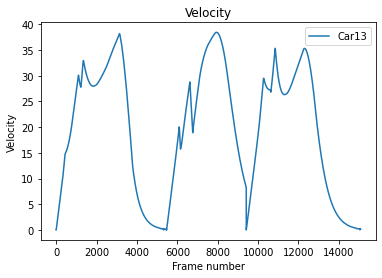

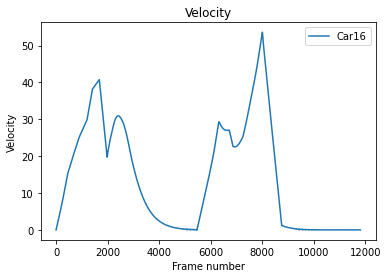

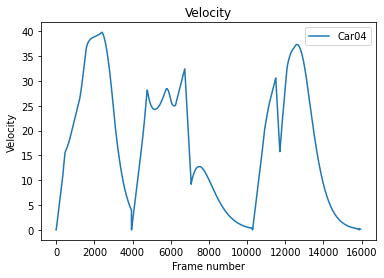

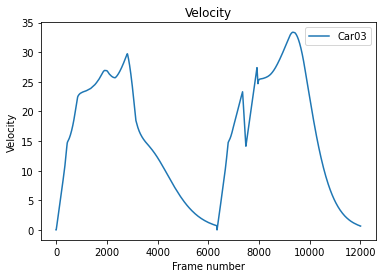

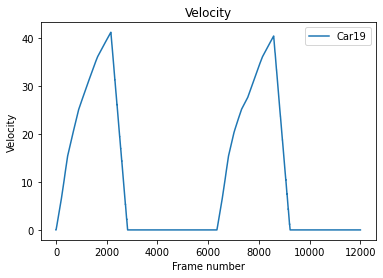

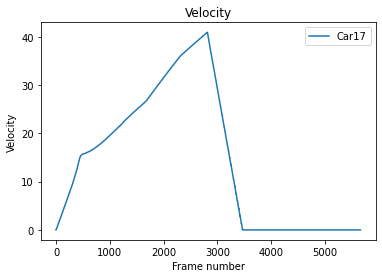

In [4]:
for car_name in velocity_dict:
    num_vals = len(velocity_dict[car_name])
    for i in range(num_vals):
        if(velocity_dict[car_name][i] < 0): velocity_dict[car_name][i] = 0
visualize(velocity_dict, "Velocity")

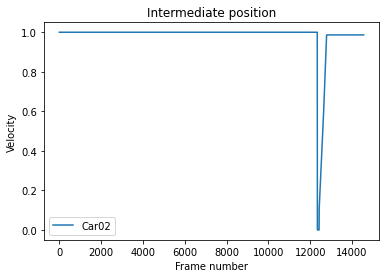

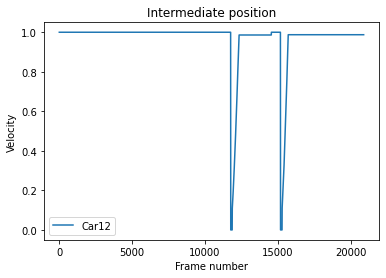

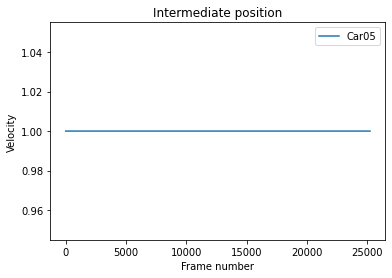

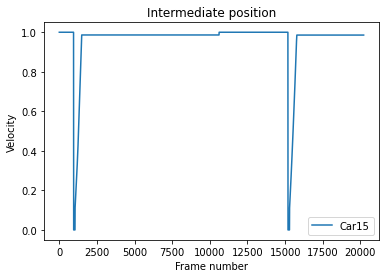

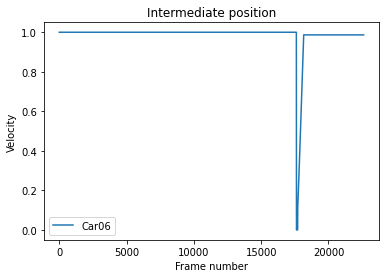

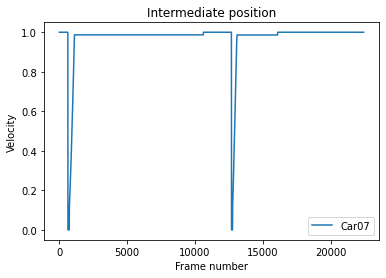

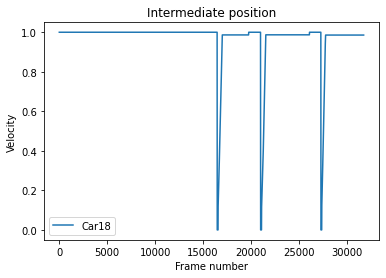

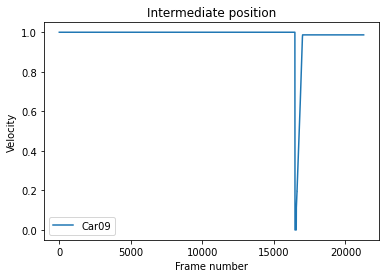

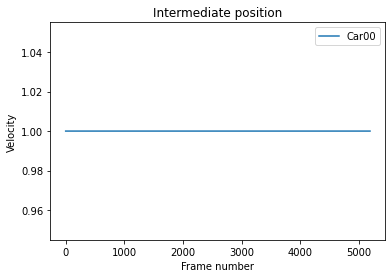

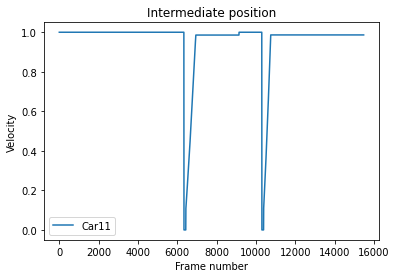

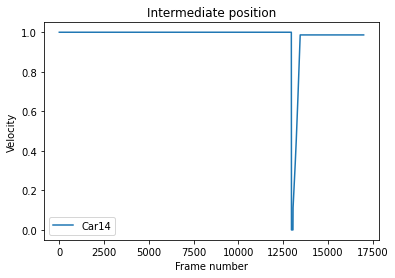

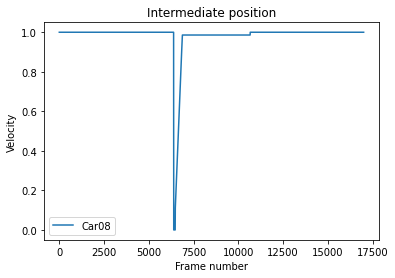

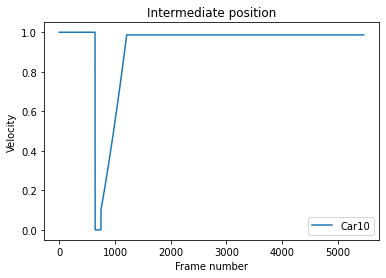

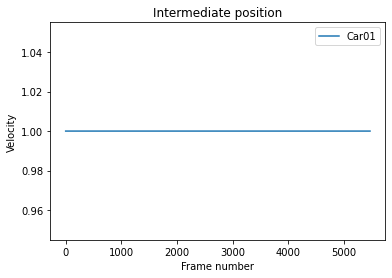

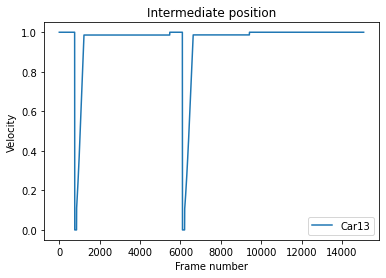

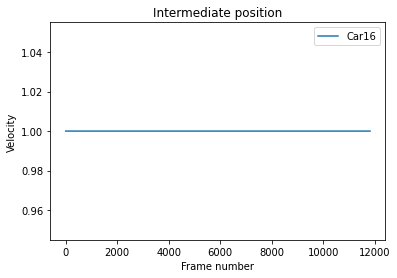

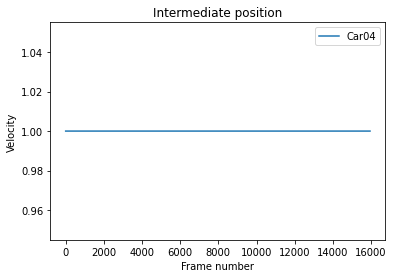

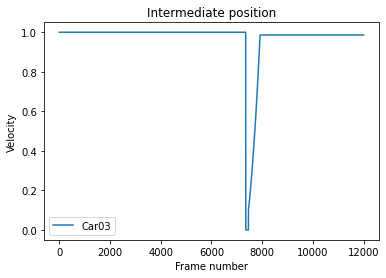

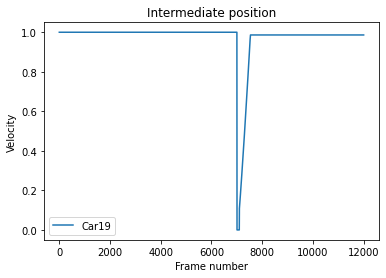

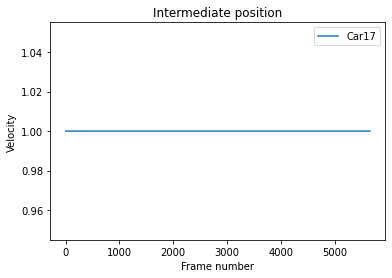

In [5]:
for car_name in velocity_dict:
    num_vals = len(interim_pos_dict[car_name])
    for i in range(num_vals):
        if(interim_pos_dict[car_name][i] < 0): interim_pos_dict[car_name][i] = 0
visualize(interim_pos_dict, "Intermediate position")